In [1]:
import sys
sys.path.append("../")

In [61]:
import scipy
from post_processing.src import hdf5_tools
from post_processing.src import plotting
from post_processing.src import filter_joints
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
from platform import python_version

%matplotlib inline 

In [62]:
python_version()

'3.8.10'

In [3]:
hdf5_files = hdf5_tools.load_hdf5_files("/media/mjsobrep/43CDA61E672B9161/pose")

In [4]:
hdf5_tools.check_data(hdf5_files)

bad data for 060 lower camera openpose
bad data for 060 upper camera mp-hands left hand
bad data for 060 upper camera mp-hands right hand
bad data for 500-3 lower camera openpose
bad data for 500-3 upper camera mp-hands left hand
bad data for 500-3 upper camera mp-hands right hand


In [5]:
all_subj=list(hdf5_files.keys())
all_subj.remove('060')
all_subj.remove('500-3')

In [57]:
files_list=[hdf5_files[subj] for subj in all_subj]

In [64]:
with multiprocessing.Pool() as pool:
    res_all = pool.imap(filter_joints.filter_file, files_list)

In [ ]:
next(res_all)

In [7]:
res=filter_joints.filter_file(hdf5_files['031'])

added an end to the end
working on game 0
filtering a simon says game
working on RWrist
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on RElbow
Eliminating wrist occlusions
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on RShoulder
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on LWrist
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on LElbow
Eliminating wrist occlusions
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on LShoulder
Filtering with Hampel Filter


/home/mjsobrep/Documents/git/FloAssessmentPipeline/notebooks/../post_processing/src/filter_joints.py:152: RuntimeWarning: invalid value encountered in true_divide
  dist = np.abs((x_2-x_1)*(y_1-y_0)-(x_1-x_0)*(y_2-y_1)) / \


Smoothing with Kalman Smoother
working on game 1
working on game 2
filtering a simon says game
working on RWrist
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on RElbow
Eliminating wrist occlusions
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on RShoulder
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on LWrist
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on LElbow
Eliminating wrist occlusions
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on LShoulder
Filtering with Hampel Filter
Smoothing with Kalman Smoother
working on game 3


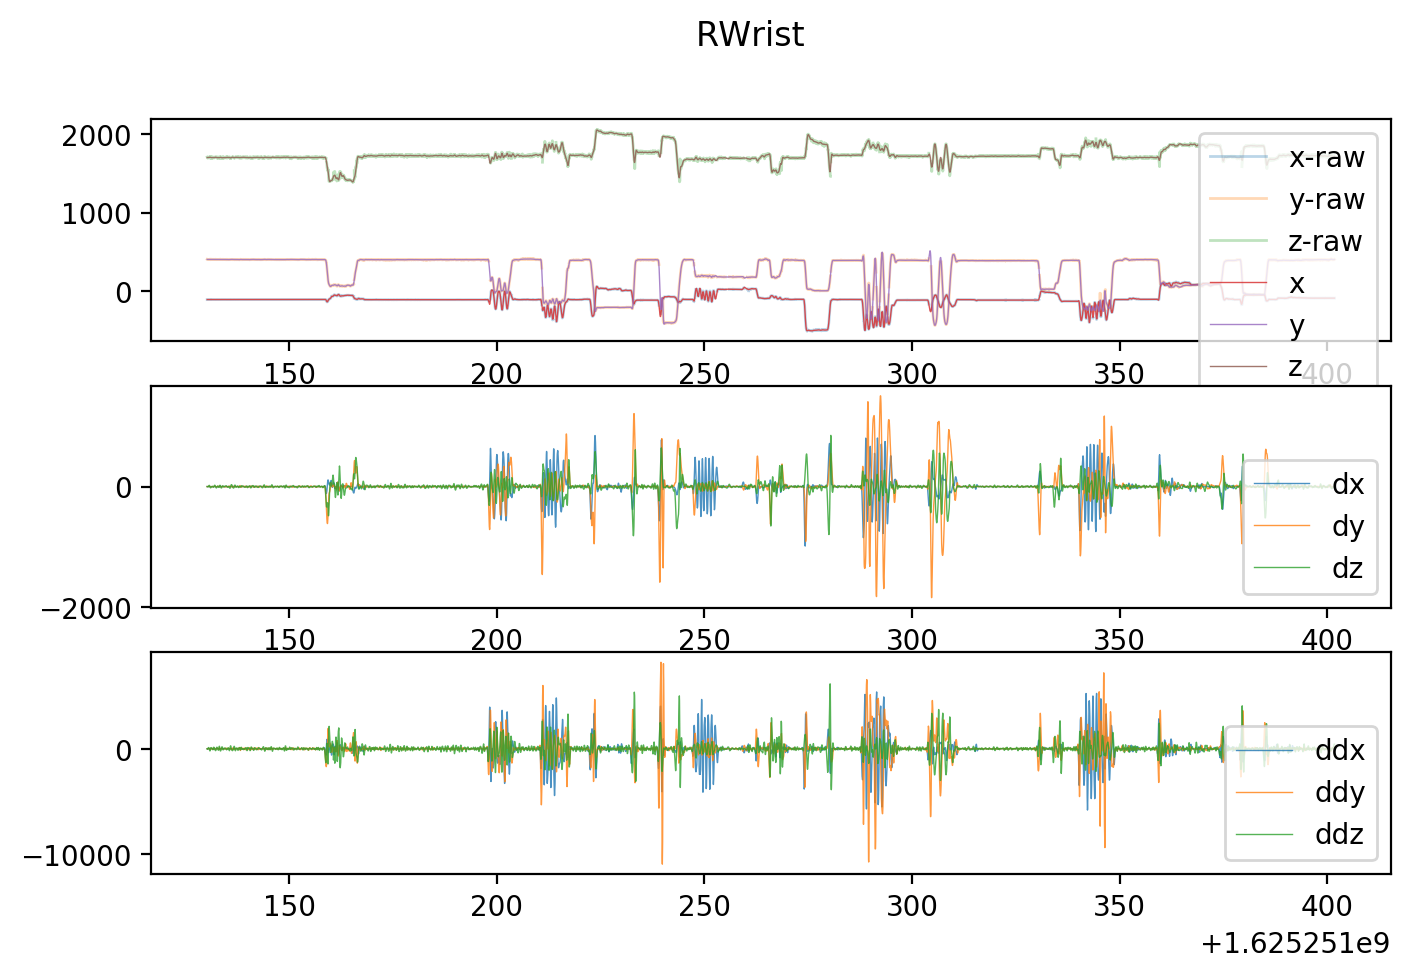

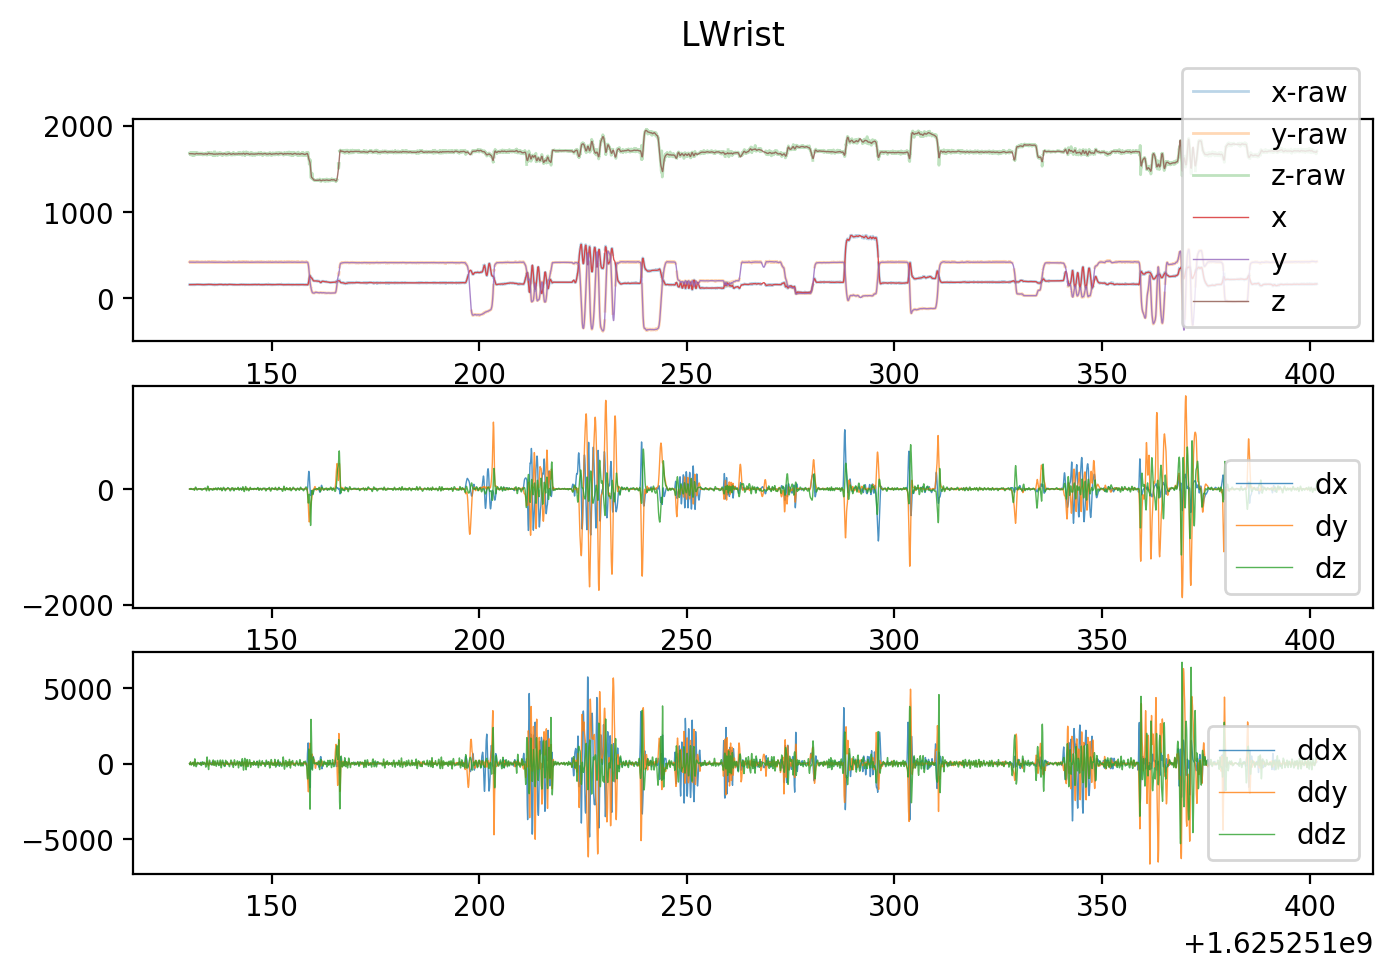

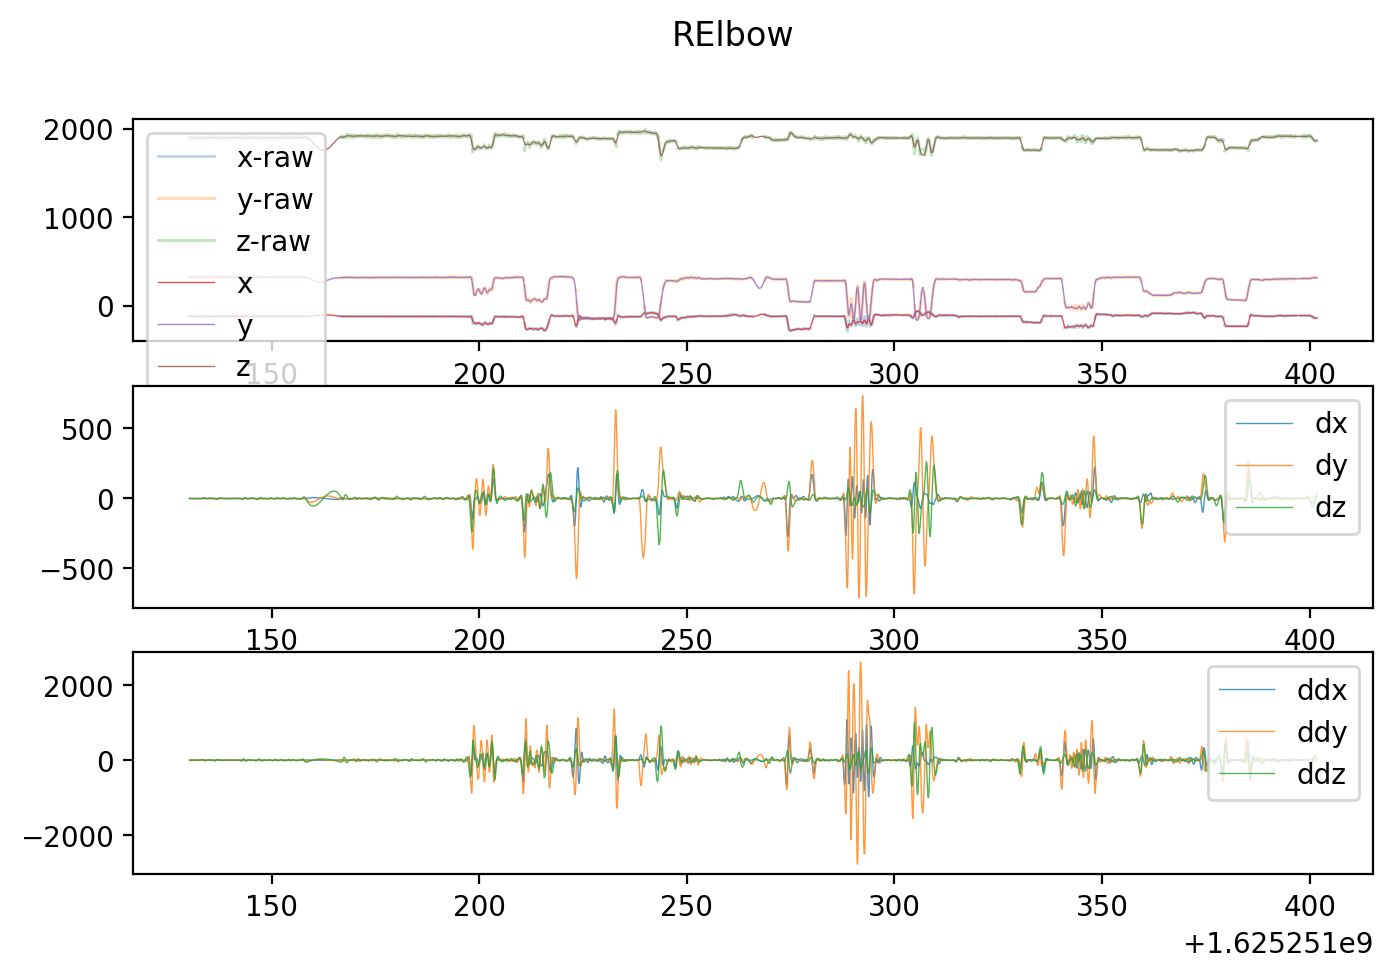

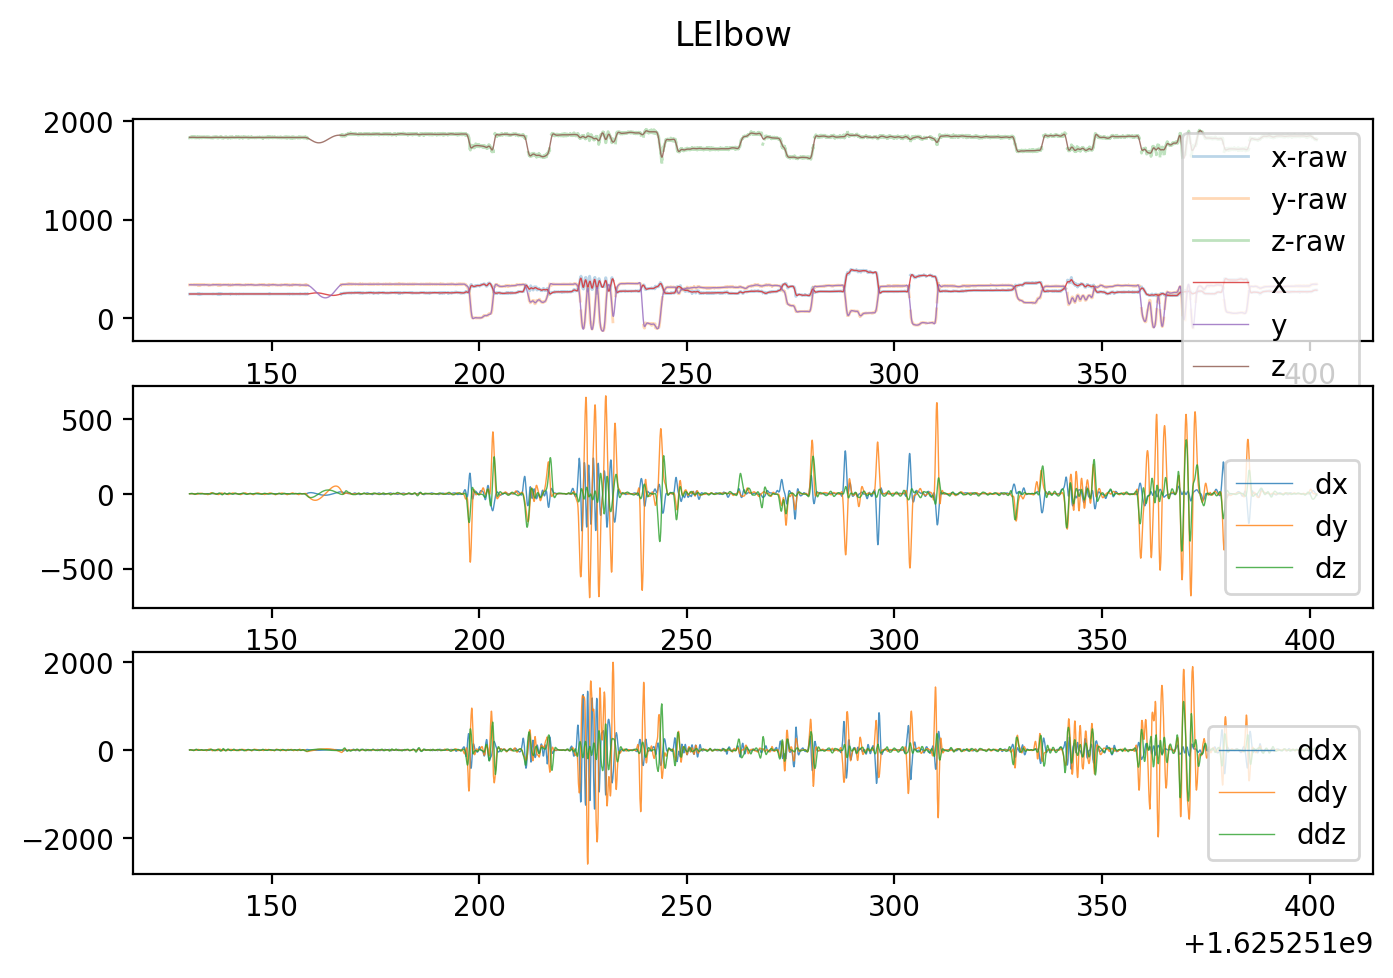

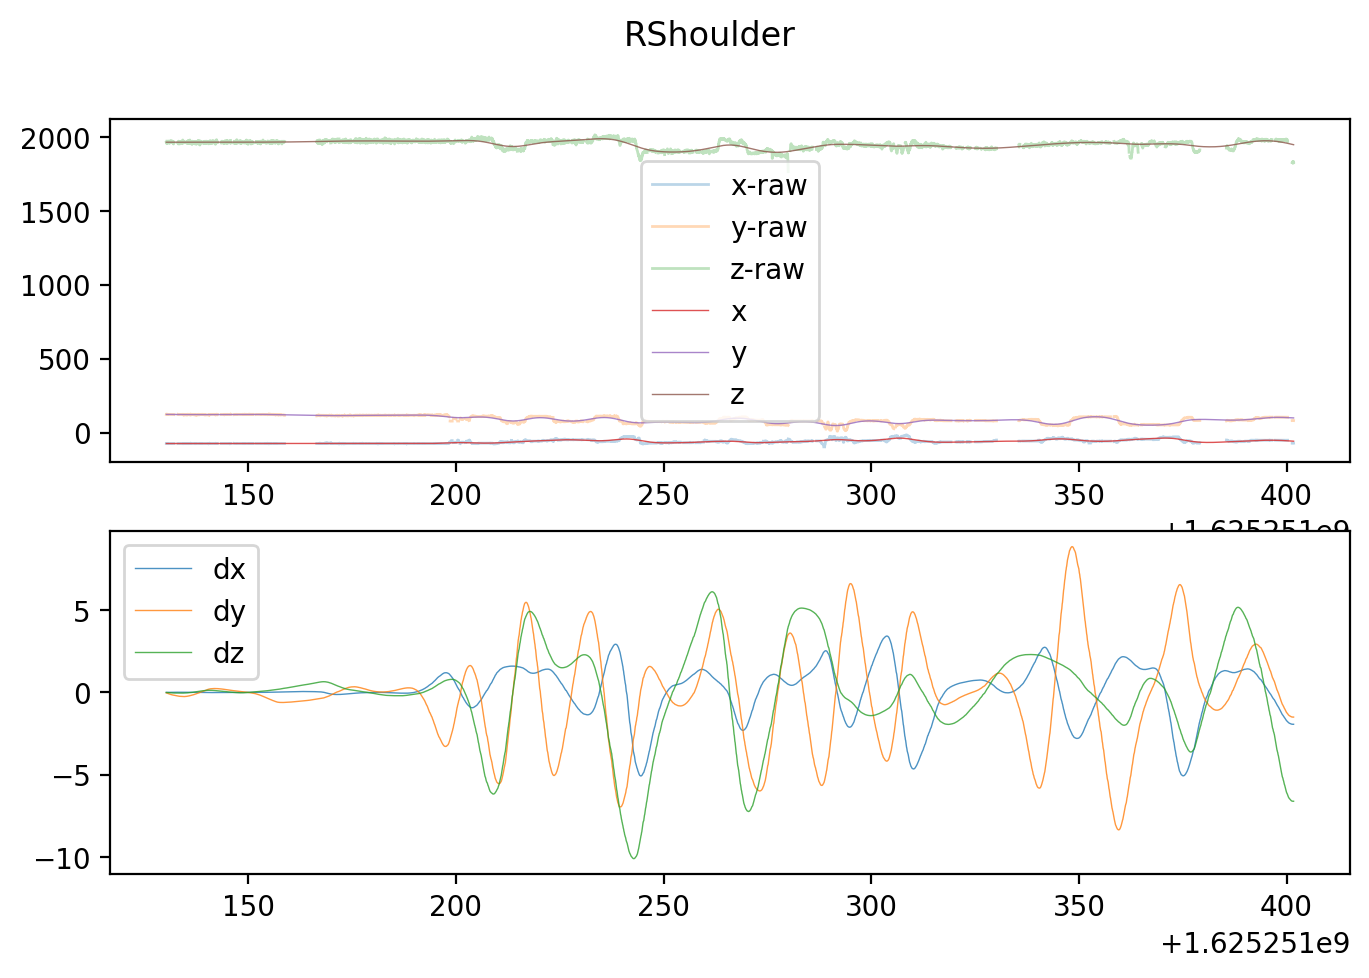

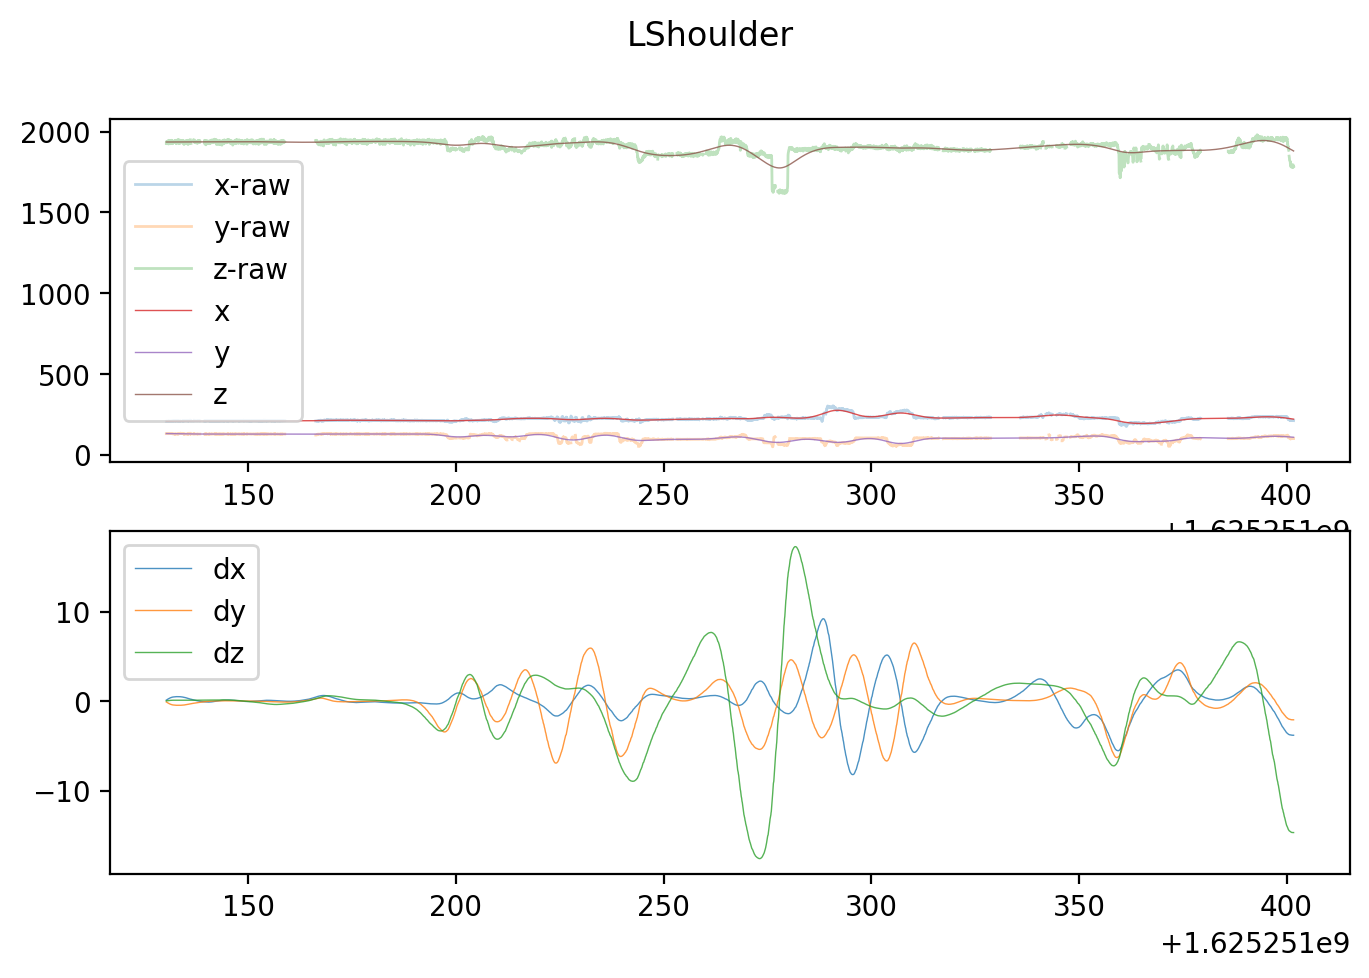

In [8]:
gd=res[0]['state']
for joint in ['RWrist', 'LWrist','RElbow','LElbow','RShoulder','LShoulder']:
    plotting.plot_model_results(gd['time'], gd['raw'][joint], gd['smooth'][joint], title=joint)


In [49]:
# 1) subtract shoulder location from values (would be better to come at this from )
# 2) add shoulder location (0,0) to list to make convex hull
# 3) divide by arm length ^ 3
ch=scipy.spatial.ConvexHull(gd['smooth']['RWrist'][:,0:3]-gd['smooth']['RShoulder'][:,0:3])
# TODO: include the angular effects of shoulder positions 
# Could add in shoulder as a point:
# ch=scipy.spatial.ConvexHull(np.append(gd['smooth']['RWrist'][:,0:3]-gd['smooth']['RShoulder'][:,0:3],[[0,0,0]],axis=0))

In [50]:
forearm_length=np.sqrt(np.sum((gd['smooth']['RWrist'][:,:3]-gd['smooth']['RElbow'][:,:3])**2,axis=1))
upper_arm_length=np.sqrt(np.sum((gd['smooth']['RElbow'][:,:3]-gd['smooth']['RShoulder'][:,:3])**2,axis=1))
med_arm_length=np.median(forearm_length+upper_arm_length)

In [51]:
norm_ch = ch.volume/(4/3*np.pi*med_arm_length**3)
norm_ch

0.35380458215786253